In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
#     initializer=tfe.Initializer.Normal.value,
#     init_sd=0.01,
    initializer=tfe.Initializer.He_Normal.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)

Multi Layer Network Model - ID: MD7IQ5UU


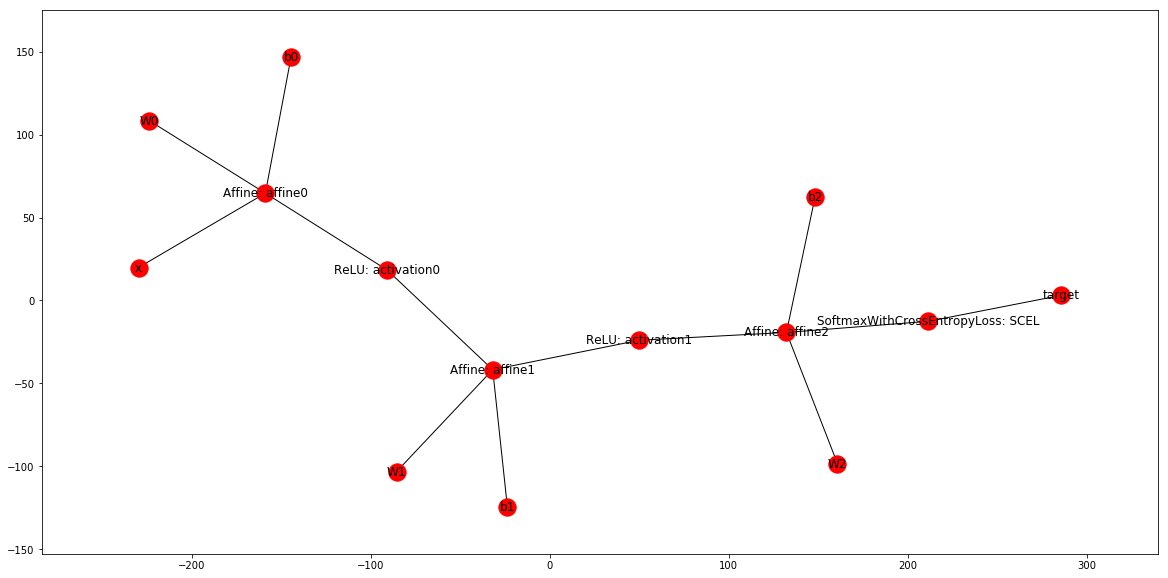

In [3]:
n.draw_and_show(figsize=(20, 10))

In [4]:
data = mnist.MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)
#data = mnist.Fashion_MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)

In [5]:
forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
#%timeit -n1 -r1 n.learning(
n.learning(
    max_epoch=5, 
    data=data, 
    batch_size=batch_size, 
    print_period=1, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()

forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.1246
-- Learning Started --
Epoch   0 Completed - Train Error:14.37765 - Validation Error:13.93735 - Test Accuracy:0.12460 <== Minimal Val. Error
Fold:  0
Epoch   1 Completed - Train Error:0.29921 - Validation Error:0.31149 - Test Accuracy:0.90880 <== Minimal Val. Error
Epoch   2 Completed - Train Error:0.17347 - Validation Error:0.21689 - Test Accuracy:0.93440 <== Minimal Val. Error
Epoch   3 Completed - Train Error:0.19165 - Validation Error:0.17994 - Test Accuracy:0.94400 <== Minimal Val. Error
Epoch   4 Completed - Train Error:0.12819 - Validation Error:0.16162 - Test Accuracy:0.94810 <== Minimal Val. Error
Epoch   5 Completed - Train Error:0.10284 - Validation Error:0.15221 - Test Accuracy:0.95220 <== Minimal Val. Error

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch:  5 (Fold:  0 & Epoch:  5) - Train Error:0.10284 - Validation Error:0.15221 - Test Accuracy:0.95220

Fold:  1
Epoch   1 Completed - Train Error:0.10675 - Validation Error:

In [6]:
print("Epoch:{:3d}, Min Train Error:{:7.5f}, Min Validation Error:{:7.5f}, Test Accuracy:{:7.5f}".format(
    n.min_validation_error_epoch,
    n.min_train_error,
    n.min_validation_error,
    n.test_accuracy_at_min_validation_error_epoch
))

print("Mean of Min Va. Error For All Folds:{:7.5f}".format(n.mean_min_validation_error_for_all_folds))

Epoch: 56, Min Train Error:0.00008, Min Validation Error:0.00006, Test Accuracy:0.97430
Mean of Min Va. Error For All Folds:0.03289


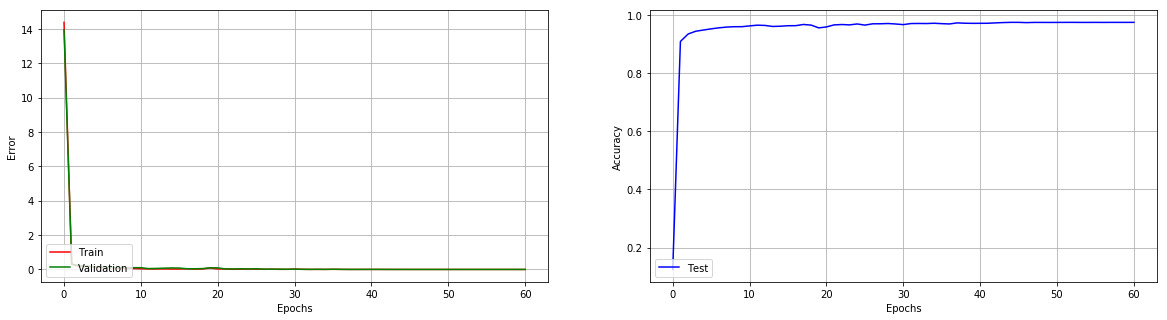

In [7]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 38, Prediction: Three, Ground Truth: Two
False Prediction Index: 115, Prediction: Nine, Ground Truth: Four
False Prediction Index: 119, Prediction: Eight, Ground Truth: Two
False Prediction Index: 149, Prediction: Nine, Ground Truth: Two
False Prediction Index: 158, Prediction: Two, Ground Truth: Three


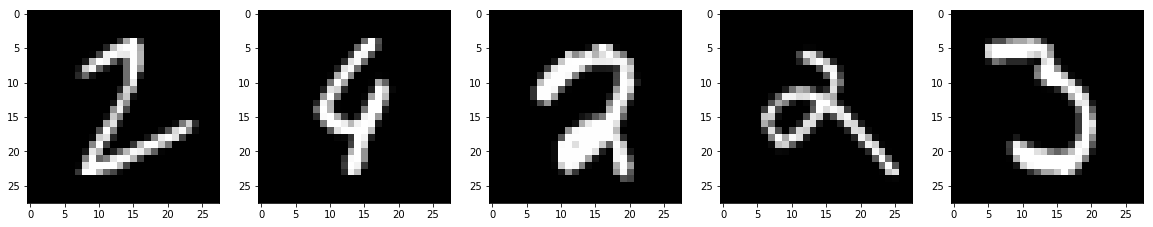

In [8]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

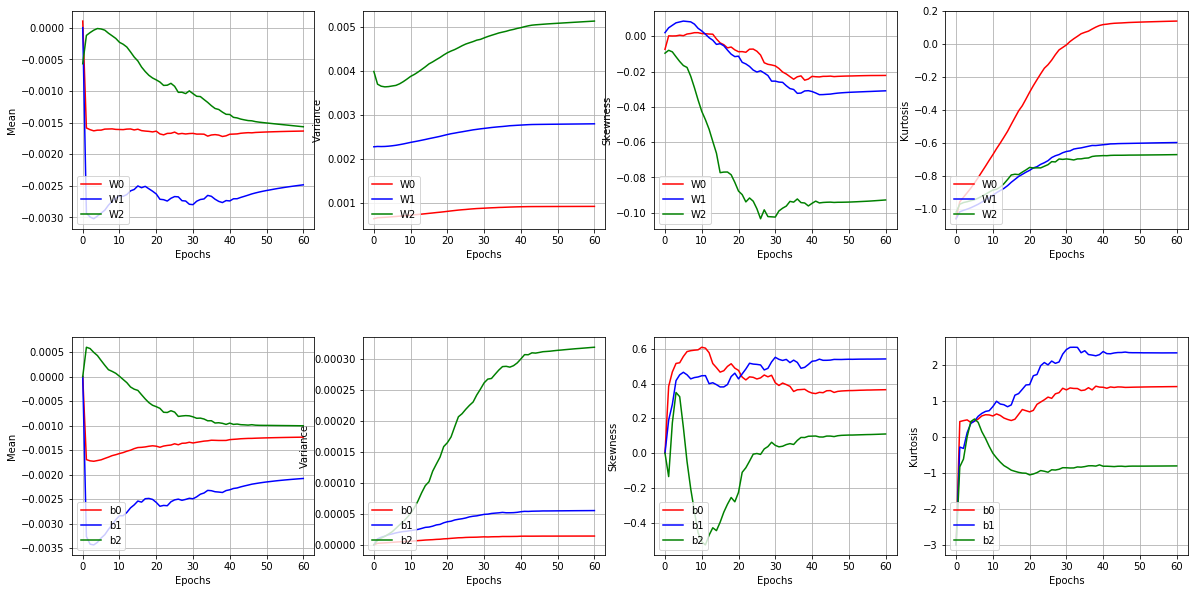

In [9]:
n.draw_param_description(figsize=(20, 10))

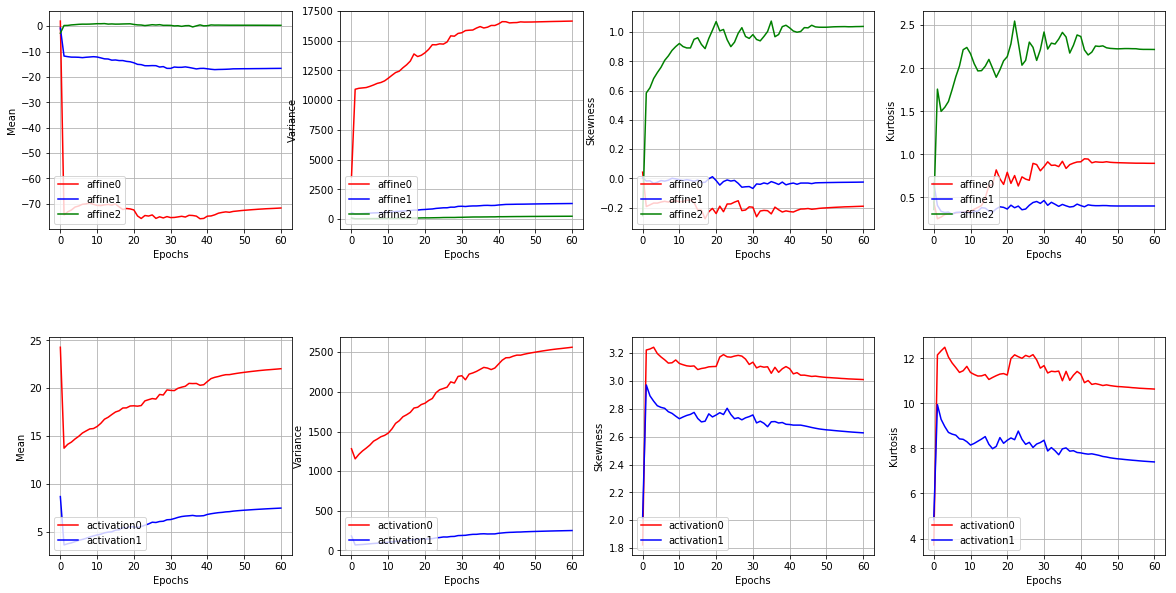

In [10]:
n.draw_output_description(figsize=(20, 10))